### JAI SHREE RAM

Stage 1: Predicting if patient should be admitted or not

In [510]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [511]:
df = pd.read_csv('heart_disease_admission.csv')
pid = 989
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Admitted
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Yes
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,No
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Yes
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,No
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,No


In [512]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [513]:
# Checking for missing values.
df.isnull().values.any()

False

<AxesSubplot:xlabel='Admitted', ylabel='count'>

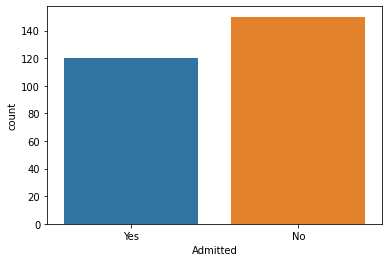

In [514]:
sns.countplot(x='Admitted', data=df)

In [515]:
# Checking for any correlations.
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [516]:
#change presence to 1 and absence to 0
df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Admitted
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


#### KNN

In [517]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)
x_test.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3
153,64,0,4,130,303,0,0,122,0,2.0,2,2,3
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3


In [518]:
# # Using standard scaler as a standardization technique.
# sc_x = StandardScaler()
# x_train = sc_x.fit_transform(x_train)
# x_test = sc_x.transform(x_test)

In [519]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.746794344808963

In [520]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [521]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1])

In [522]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[35 20]
 [15 25]]


In [523]:
print(accuracy_score(y_test,y_pred))

0.631578947368421


#### SVM

In [524]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
print(x_train.shape)
y_pred = clf.predict(x_test)

(175, 13)


In [525]:
print(accuracy_score(y_test,y_pred))

0.5789473684210527


#### RF

In [526]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

In [527]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

confusion matrix
[[43 12]
 [ 9 31]]


In [528]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100)

Accuracy of Random Forest: 77.89473684210526


In [529]:
#give prediction score of every prediction
rf_predicted_proba = rf.predict_proba(x_test)

In [530]:
df_final = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predicted,'Urgency Score': rf_predicted_proba[:,1]*100})
#append x_test to df_final
df_final = pd.concat([x_test, df_final], axis=1)
df_final.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Actual,Predicted,Urgency Score
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,1,50.768943
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3,0,0,22.992624
153,64,0,4,130,303,0,0,122,0,2.0,2,2,3,0,1,89.660817
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7,1,1,80.848525
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3,0,0,24.559152


In [531]:
df_final

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Actual,Predicted,Urgency Score
64,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,1,50.768943
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3,0,0,22.992624
153,64,0,4,130,303,0,0,122,0,2.0,2,2,3,0,1,89.660817
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7,1,1,80.848525
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3,0,0,24.559152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,45,1,4,142,309,0,2,147,1,0.0,2,3,7,1,1,74.222421
194,48,1,3,124,255,1,0,175,0,0.0,1,2,3,0,0,27.443162
210,59,1,1,170,288,0,2,159,0,0.2,2,0,7,1,0,30.126679
145,53,1,4,123,282,0,0,95,1,2.0,2,2,7,1,1,94.130874


In [532]:
#keep only the rows where the prediction score of 1 is greater than 0.5
df_final = df_final[df_final['Urgency Score'] > 50.0]
df_final.sort_values(by=['Urgency Score'], ascending=False, inplace=True)

In [533]:
df_final

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Actual,Predicted,Urgency Score
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,1,1,98.196249
176,51,1,4,140,298,0,0,122,1,4.2,2,3,7,1,1,96.321198
16,46,1,4,140,311,0,0,120,1,1.8,2,2,7,1,1,95.592806
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,1,1,95.289008
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1,95.258880
92,54,1,4,124,266,0,2,109,1,2.2,2,1,7,1,1,94.663355
145,53,1,4,123,282,0,0,95,1,2.0,2,2,7,1,1,94.130874
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1,1,94.037527
126,62,1,4,120,267,0,0,99,1,1.8,2,2,7,1,1,90.539153
103,57,1,4,165,289,1,2,124,0,1.0,2,3,7,1,1,90.371228


In [534]:
#drop actual column
df_final.drop(['Actual'], axis=1, inplace=True)

In [535]:
df_final

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Predicted,Urgency Score
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,1,98.196249
176,51,1,4,140,298,0,0,122,1,4.2,2,3,7,1,96.321198
16,46,1,4,140,311,0,0,120,1,1.8,2,2,7,1,95.592806
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,1,95.289008
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,95.258880
92,54,1,4,124,266,0,2,109,1,2.2,2,1,7,1,94.663355
145,53,1,4,123,282,0,0,95,1,2.0,2,2,7,1,94.130874
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1,94.037527
126,62,1,4,120,267,0,0,99,1,1.8,2,2,7,1,90.539153
103,57,1,4,165,289,1,2,124,0,1.0,2,3,7,1,90.371228


In [536]:
#save the final model
import pickle
pickle.dump(rf, open('model.pkl','wb'))
df_final.to_csv('isAdmitted.csv')